# Fashion_mnist Classification

In [ ]:
# Import the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Analysis and Visualization

In [ ]:
# Import the data from Tensorflow datasets
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# visualize the shapes of train and test data

train_data.shape,test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Visualize the shapes of train and test labels
train_labels.shape,test_labels.shape

((60000,), (10000,))

In [ ]:
class_names=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
categorie= pd.DataFrame(class_names,columns=["Description"])
categorie

,Description
0,T-shirt/Top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [ ]:
train_data[0],train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

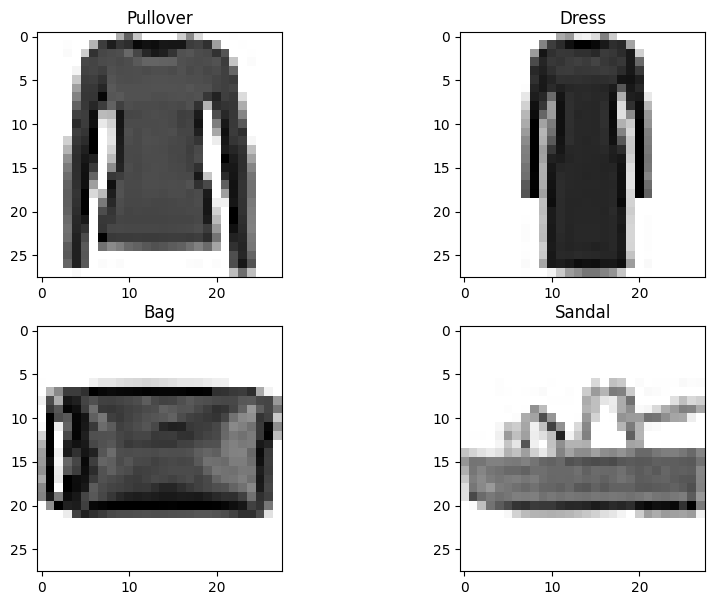

In [ ]:
# Visualize 4 random samples
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10,7))

for i in range(4):
  plt.subplot(2,2,i+1)
  rand_index= random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  label = class_names[train_labels[rand_index]]
  plt.title(label)


# Normalize the data

In [ ]:
# find the max in train and test sets
tf.reduce_max(train_data).numpy(),tf.reduce_max(test_data).numpy()

(255, 255)

In [ ]:
# Normalize the data

train_data_normal = train_data/255.0
test_data_normal = test_data/255.0

train_data_normal[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Buliding the model

In [ ]:
# Set the random seed

tf.random.set_seed(42)
model =tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=["accuracy"])

history = model.fit(train_data_normal,train_labels,epochs=20)


Epoch 1/20
1875/1875 [==============================] - 24s 10ms/step - loss: 0.5860 - accuracy: 0.7945
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3948 - accuracy: 0.8578
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3596 - accuracy: 0.8695
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3349 - accuracy: 0.8782
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3192 - accuracy: 0.8832
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3061 - accuracy: 0.8876
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.8919
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2857 - accuracy: 0.8939
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2761 - accuracy: 0.8981
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

# Evaluate the model

In [ ]:
model.evaluate(test_data_normal,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8814


[0.35672250390052795, 0.8813999891281128]

# Plot the loss curve

Text(0, 0.5, 'loss')

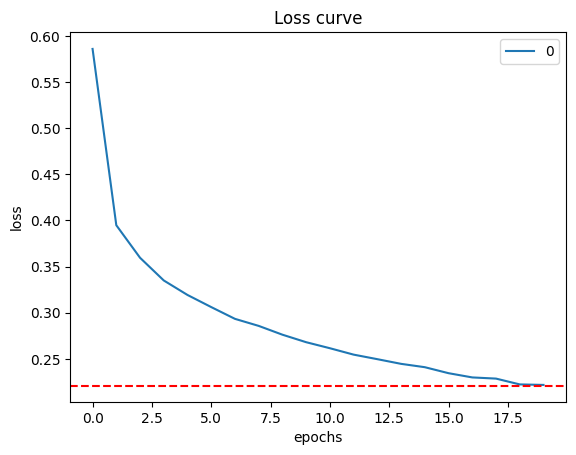

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history["loss"]).plot(title="Loss curve")
plt.axhline(0.22, color='r', linestyle='dashed') # horizontal
plt.xlabel("epochs")
plt.ylabel("loss")

# Plot the accuracy curve

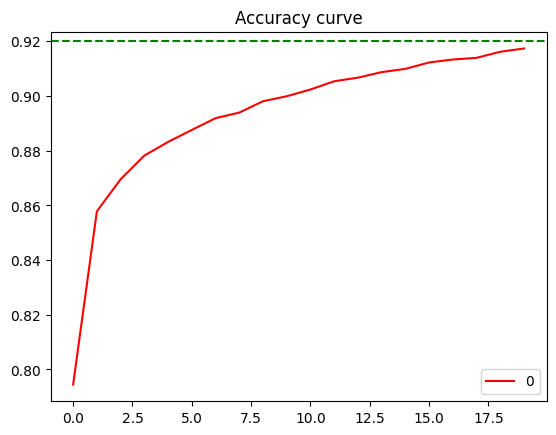

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history["accuracy"]).plot(title="Accuracy curve",c='r')
plt.axhline(0.92,color='g', linestyle='dashed') # horizontal)

# Create the confusion Matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None,figsize=(10,10),text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Reds) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # list of classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

## Create prediction

In [ ]:
# create prediction
y_prob = model.predict(test_data_normal)
y_prob[0]

313/313 [==============================] - 1s 2ms/step


array([2.7540436e-06, 1.8125611e-10, 2.7020196e-08, 2.2092154e-07,
       1.9239162e-06, 2.0861868e-05, 3.1474954e-07, 8.0583962e-03,
       1.8769556e-06, 9.9191356e-01], dtype=float32)

In [ ]:
test_labels[0]

9

###Here we can see that the truth and prediction label do not have the same shape, we need to reshape y_prob.

### Reshape predictions

In [ ]:
y_pred = tf.argmax(y_prob,axis=1)
y_pred[0].numpy()

9

### The confusion matrix

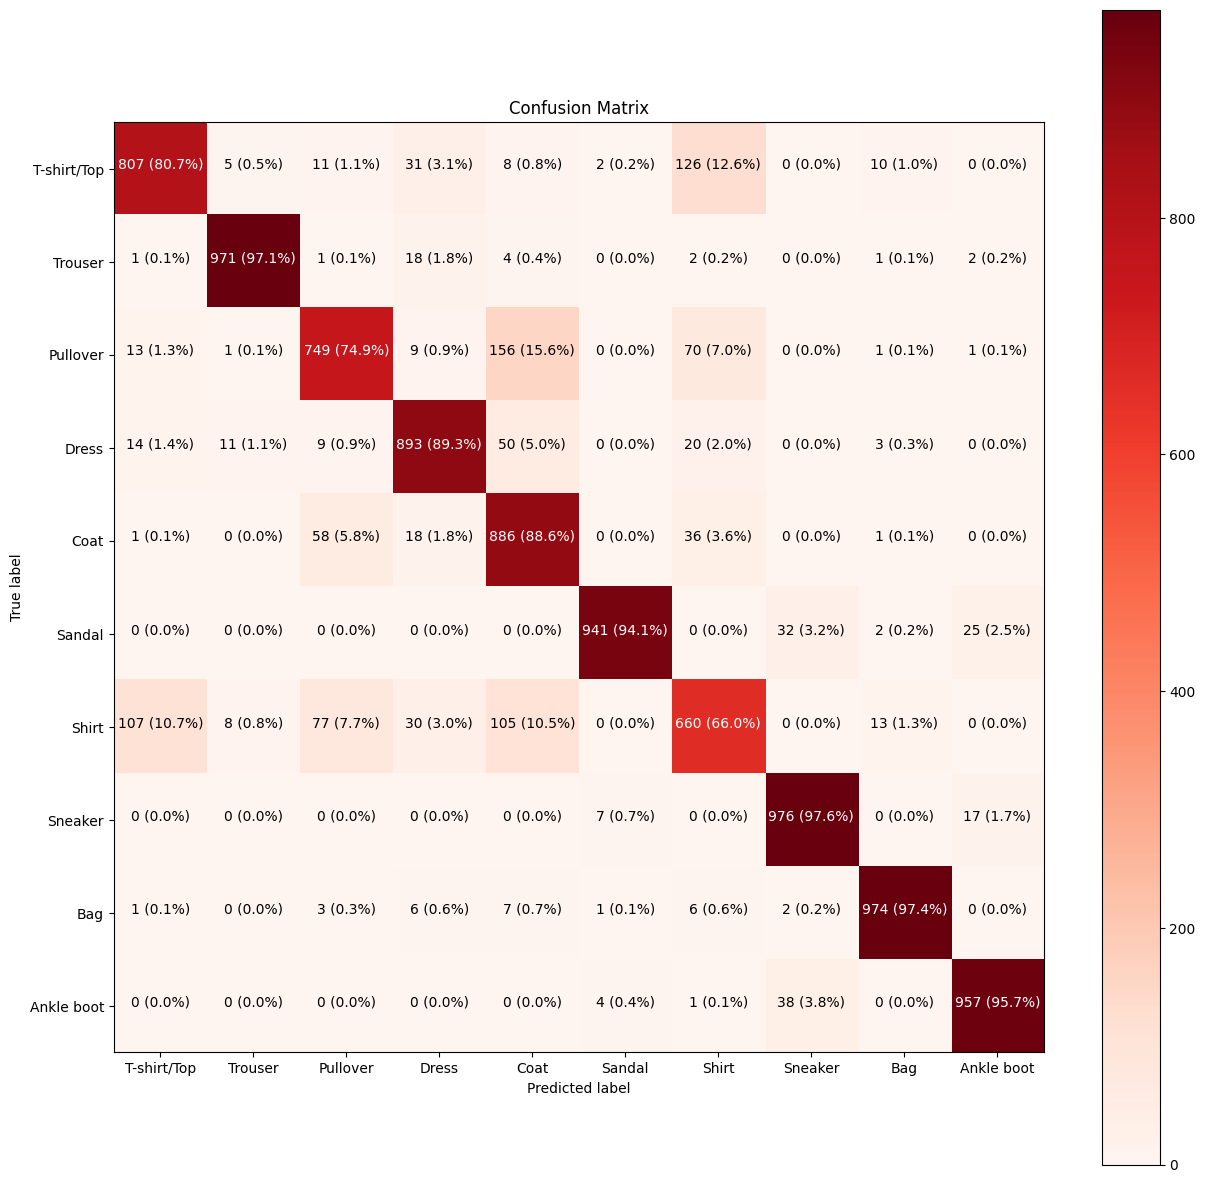

In [ ]:
make_confusion_matrix(y_true=test_labels,y_pred=y_pred,classes=class_names,figsize=(15,15),text_size=10)

### Now we need to visualize whether our model's predictions are correct

the truth label is: Sneaker
the pridict label is:Sneaker


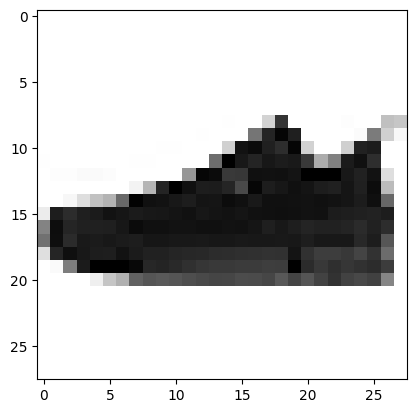

In [ ]:
# Plot the image
import random
for i in range(1):

  r_index=random.choice(range(len(test_data_normal)))
  plt.imshow(test_data_normal[r_index],cmap=plt.cm.binary)
  truth_label=class_names[test_labels[r_index]]
  pridict_label = class_names[y_pred[r_index]]
  print(f"the truth label is: {truth_label}")
  print(f"the pridict label is:{pridict_label}")



# Save the model

In [ ]:
# Save the model
model.save("fashion.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
